<a href="https://colab.research.google.com/github/aksha1234/akshay-/blob/master/30days_ml_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 30days-ml-competition
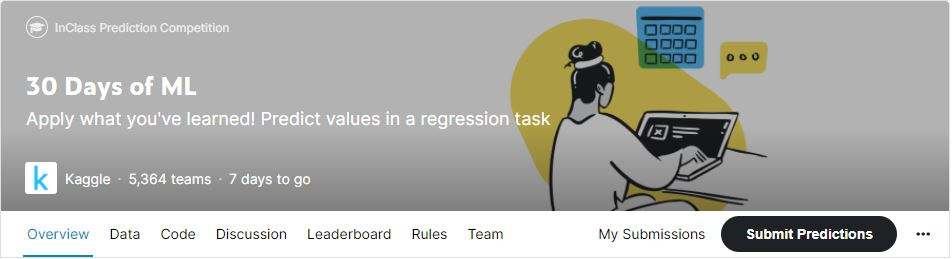



The dataset is used for this competition is synthetic (and generated using a CTGAN), but based on a real dataset. The original dataset deals with predicting the amount of an insurance claim. Although the features are anonymized, they have properties relating to real-world features.

**Important Note**
You are only eligible to join this competition if you are registered for the 30 Days of ML challenge and have received an invite link to your personal email.

- Please do not share the invitation link that you have received by email with anyone else.
- In order to be eligible to win a prize, you must be registered for the 30 Days of ML challenge.

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('30days-ml-competition')
jovian.set_colab_id('1ZVJdbWSTtZEhBhs6xLrz2vaU0A86536L')

     |████████████████████████████████| 68 kB 1.9 MB/s 


In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="30days-ml-competition")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/akkikadwe/30days-ml-competition


'https://jovian.ai/akkikadwe/30days-ml-competition'

In [5]:
!pip install opendatasets --upgrade --q

## 1.  Loading the datasets 

In [6]:
import opendatasets as od
import os

In [7]:
## url of teh competition
url='https://www.kaggle.com/c/30-days-of-ml/data'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akshaykadwe
Your Kaggle Key: ··········


100%|██████████| 66.0M/66.0M [00:00<00:00, 73.5MB/s]



Extracting archive ./30-days-of-ml/30-days-of-ml.zip to ./30-days-of-ml


In [8]:
## Lets see the filesin the datasets
os.listdir('30-days-of-ml')

['train.csv', 'sample_submission.csv', 'test.csv']

## 2. Importing the libraries 

In [75]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score

## 3. Loading the datasets 

In [28]:
train_df=pd.read_csv('/content/30-days-of-ml/train.csv')
test_df=pd.read_csv('/content/30-days-of-ml/test.csv')
sample_df=pd.read_csv('/content/30-days-of-ml/sample_submission.csv')

In [12]:
train_df

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,B,B,A,A,B,D,A,E,A,I,0.697124,0.483452,0.297770,0.195821,0.307883,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605
299996,499996,A,B,A,C,B,B,A,E,E,F,0.446200,0.715135,0.610931,0.601730,0.736713,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118
299997,499997,B,B,A,C,B,C,A,E,G,F,0.544279,0.060937,0.590955,0.905308,0.277074,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755
299998,499998,A,B,A,C,B,B,A,E,E,I,0.300062,0.613118,0.285213,0.406851,0.805963,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030,7.229569


In [13]:
test_df

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,B,B,B,C,B,B,A,E,E,I,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,A,B,A,C,B,C,A,E,C,H,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,B,A,A,A,B,B,A,E,D,K,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,B,B,A,C,B,D,A,E,A,N,1.031239,0.356062,0.303651,0.895591,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,B,B,A,C,B,C,A,E,C,F,0.530447,0.729004,0.281723,0.444698,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499987,B,A,A,C,B,D,A,E,E,I,0.505445,0.710839,0.225285,0.932926,0.287454,0.543800,0.682378,1.028978,1.022741,0.683903,0.877273,0.532410,0.605397,0.884581
199996,499990,B,A,A,C,B,B,A,E,C,F,0.350751,0.887132,0.346864,0.284264,0.794881,0.432778,0.389775,0.359871,0.550013,0.492082,0.202295,0.416875,0.406205,0.758665
199997,499991,A,B,B,C,B,B,A,E,C,I,0.378393,0.549489,0.411319,0.437275,0.514487,0.060997,0.171741,0.317185,0.150340,0.122109,0.390524,0.334026,0.378987,0.839416
199998,499994,A,A,A,C,B,D,A,D,A,F,1.014149,0.430139,0.067896,0.393523,0.286144,1.061710,0.819811,0.901241,0.555339,0.844315,0.894193,0.794102,0.844279,0.890473


In [14]:
sample_df

,id,target
0,0,0.5
1,5,0.5
2,15,0.5
3,16,0.5
4,17,0.5
...,...,...
199995,499987,0.5
199996,499990,0.5
199997,499991,0.5
199998,499994,0.5


## 4.Feature Engineering

In [29]:
## Lets find the inputs dataframe
input_cols=train_df.columns[1:-1].tolist()
target_cols=train_df.columns[-1]

In [30]:
## Lets find the numerical and categorical columns
numerical_cols=train_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_df[input_cols].select_dtypes(include='object').columns.tolist()

In [31]:
for col in input_cols:
  print(train_df[col].value_counts())

A    193130
B    106870
Name: cat0, dtype: int64
A    154824
B    145176
Name: cat1, dtype: int64
A    253886
B     46114
Name: cat2, dtype: int64
C    263356
A     31726
D      4328
B       590
Name: cat3, dtype: int64
B    294737
A      2978
C      1772
D       513
Name: cat4, dtype: int64
B    149340
D    126137
C     20248
A      4275
Name: cat5, dtype: int64
A    290511
B      8018
C       928
D       292
I       136
H        56
E        45
G        14
Name: cat6, dtype: int64
E    276040
D     12144
B      8297
G      2870
F       562
C        36
A        31
I        20
Name: cat7, dtype: int64
C    111103
E     79844
A     76585
G     26128
D      5187
F       966
B       187
Name: cat8, dtype: int64
F    71249
I    59218
G    28253
L    20958
H    19925
K    18057
N    16704
B    14477
J    14266
O    14203
A    11029
M     7931
C     1603
D     1088
E     1039
Name: cat9, dtype: int64
0.999677    2
0.399639    2
0.404637    2
0.800014    2
0.417535    2
           ..
0.482846 

In [32]:
## Lets find whetehr some data is missing or not
train_df.isnull().sum()


id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

In [26]:
inputs_df

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,B,B,A,A,B,D,A,E,A,I,0.697124,0.483452,0.297770,0.195821,0.307883,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404
299996,A,B,A,C,B,B,A,E,E,F,0.446200,0.715135,0.610931,0.601730,0.736713,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611
299997,B,B,A,C,B,C,A,E,G,F,0.544279,0.060937,0.590955,0.905308,0.277074,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732
299998,A,B,A,C,B,B,A,E,E,I,0.300062,0.613118,0.285213,0.406851,0.805963,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030


In [27]:
numerical_cols

['id',
 'cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'target']

In [51]:
## all are present 
inputs_df=train_df[input_cols].copy()

In [52]:
targets_df=train_df[target_cols].copy()

In [53]:
## Now lets encode the categorical columns
from sklearn.preprocessing import OneHotEncoder

In [54]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore').fit(inputs_df[categorical_cols])


In [55]:
## Lets built up the various columns
encoded_cols=encoder.get_feature_names(categorical_cols).tolist()

In [56]:
inputs_df[encoded_cols]=encoder.transform(inputs_df[categorical_cols])

In [57]:
inputs_df=inputs_df[numerical_cols+encoded_cols]

<font size = 4>**Lets split the training data into the training and validation set**

In [58]:
## Lets split the training data into the training and validation set
train_inputs,val_inputs,train_targets,val_targets=train_test_split(inputs_df,targets_df,test_size=0.3,random_state=20)

In [59]:
print(train_inputs,train_targets)

           cont0     cont1     cont2     cont3  ...  cat9_L  cat9_M  cat9_N  cat9_O
92339   0.762560  0.846354  0.005045  0.418929  ...     0.0     0.0     0.0     0.0
59593   0.539705  0.280939  0.173537  0.469399  ...     0.0     0.0     0.0     0.0
237919  0.099356  0.367153  0.290773  0.692037  ...     0.0     0.0     0.0     0.0
21597   0.620555  0.811635  0.266322  0.696790  ...     0.0     0.0     0.0     0.0
163256  0.468526  0.793746  0.521989  0.406028  ...     0.0     0.0     0.0     0.0
...          ...       ...       ...       ...  ...     ...     ...     ...     ...
178569  0.555356  0.348520 -0.013722  0.777942  ...     0.0     0.0     0.0     0.0
31962   0.523010 -0.039818  0.929641  0.260073  ...     0.0     0.0     0.0     0.0
220060  0.542611  0.306477  0.259592  0.170298  ...     0.0     0.0     1.0     0.0
285919  0.401777  0.789085  0.593905  0.470066  ...     0.0     0.0     0.0     0.0
37135   0.493073  0.805102  0.601017  0.471417  ...     0.0     0.0     0.0 

## 5. LightGBM Module 

Lets define one helper function which shows us the error.

In [60]:

def test_param_lightgbm(**param):
  model=LGBMRegressor(random_state=21,n_jobs=-1,**param).fit(train_inputs,train_targets)
  train_score=model.score(train_inputs,train_targets)
  val_score=model.score(val_inputs,val_targets)
  print(' The score of training is {:.2f} % and validation set is {:.2f}%'.format(train_score*100,val_score*100))

In [61]:
test_param_lightgbm(n_estimators=100)

 The score of training is 8.06 % and validation set is 5.73%


<font size =3> **Let us tune the hyperparameter and see the rms error to be reduce.**

In [76]:
def test_and_plot_of_lightgbm(param_name,param_values):
  train_rmse,val_rmse=[],[]
  for value in param_values:
    param={param_name:value}
    model=LGBMRegressor(random_state=21,n_jobs=-1,**param).fit(train_inputs,train_targets)
    pred_train=model.predict(train_inputs)
    pred_val=model.predict(val_inputs)
    train_err=mean_squared_error(train_targets,pred_train,squared=False)
    val_err=mean_squared_error(val_targets,pred_val,squared=False)
    train_rmse.append(train_err)
    val_rmse.append(val_err)
  plt.figure(figsize=(12,9))
  plt.plot(param_values,train_rmse,'ro-')
  plt.plot(param_values,val_rmse,'bo-')
  plt.title(' the distribution of {} parametr in LGBM'.format(param_name))
  plt.legend(['Training','Validation'])

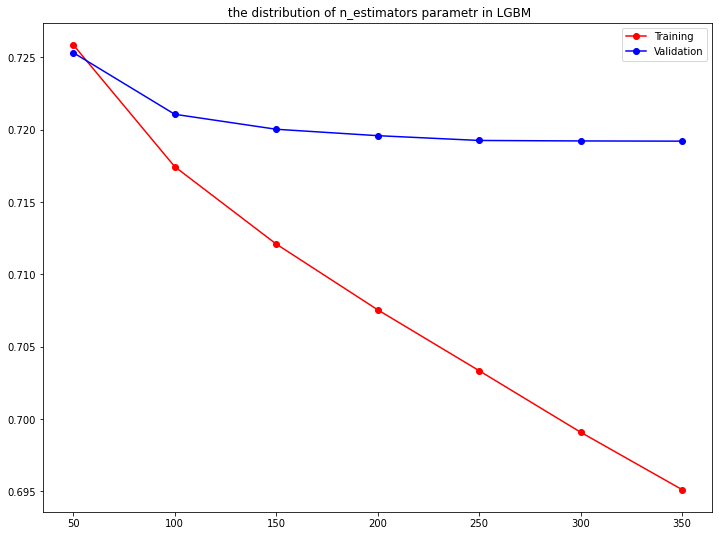

In [77]:
test_and_plot_of_lightgbm('n_estimators',np.arange(50,400,50))

CPU times: user 4min 53s, sys: 1.65 s, total: 4min 55s
Wall time: 2min 36s


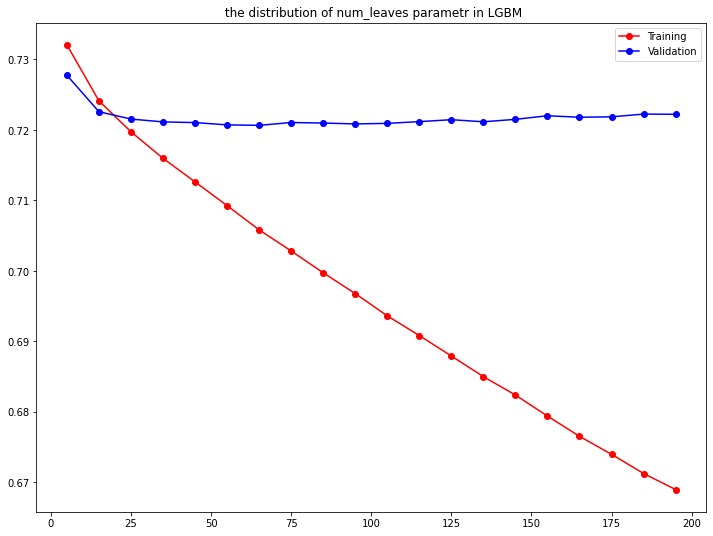

In [78]:
%%time
test_and_plot_of_lightgbm('num_leaves',np.arange(5,200,10))

CPU times: user 1min 15s, sys: 408 ms, total: 1min 16s
Wall time: 41.7 s


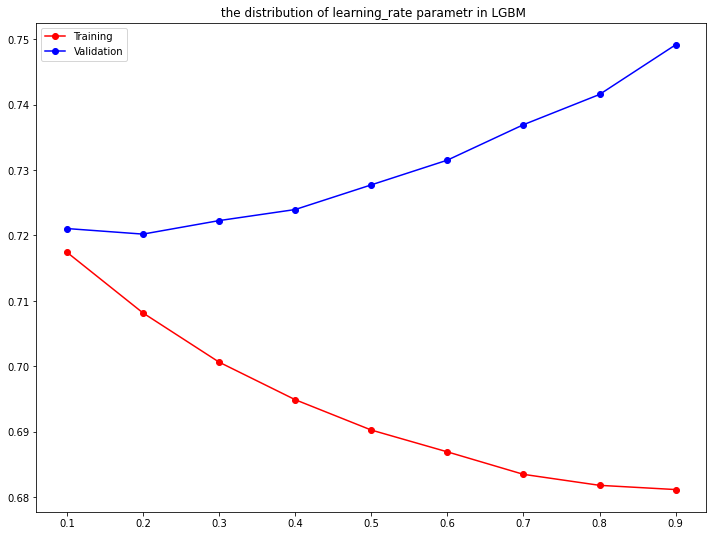

In [79]:
%%time
test_and_plot_of_lightgbm('learning_rate',np.arange(0.1,1,0.1))

CPU times: user 2min 20s, sys: 594 ms, total: 2min 21s
Wall time: 1min 15s


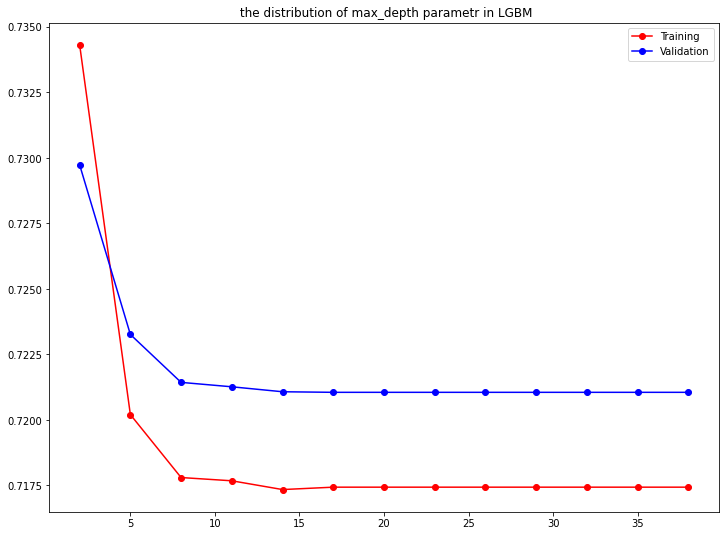

In [80]:
%%time
test_and_plot_of_lightgbm('max_depth',np.arange(2,40,3))

CPU times: user 1min 20s, sys: 378 ms, total: 1min 20s
Wall time: 43.3 s


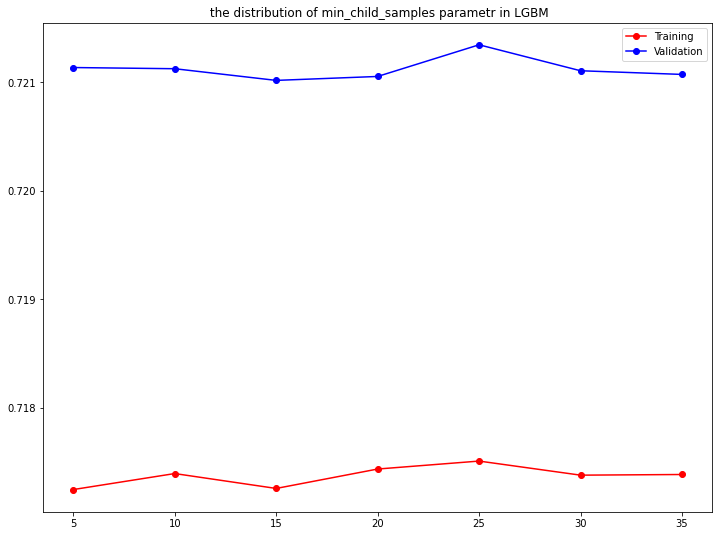

In [81]:
%%time
test_and_plot_of_lightgbm('min_child_samples',np.arange(5,40,5))

CPU times: user 1min 47s, sys: 1.17 s, total: 1min 48s
Wall time: 59.9 s


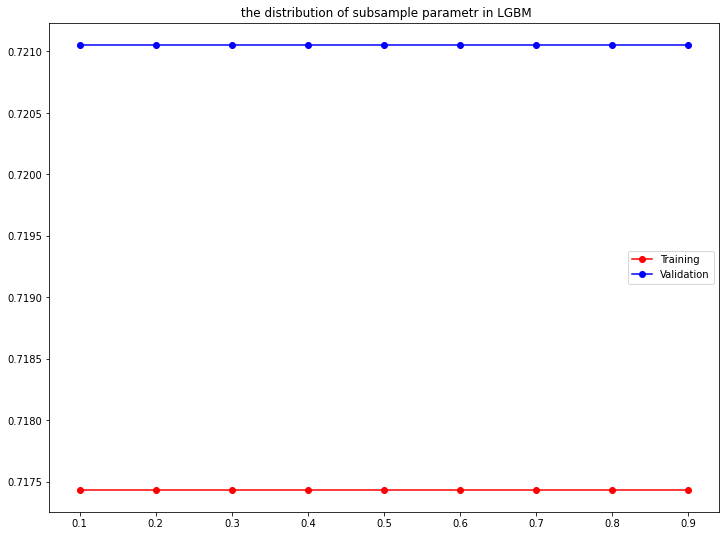

In [82]:
%%time
test_and_plot_of_lightgbm('subsample',np.arange(0.1,1,0.1))

boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split', **kwargs

## The best option for the hyper-parameter:
- min_child_samples -15
- max_depth=14
- n_estimators=200


In [83]:
test_param_lightgbm(min_child_samples=15,max_depth=14,n_estimators=200)

 The score of training is 10.58 % and validation set is 6.12%


In [84]:
model=LGBMRegressor(random_state=21,n_jobs=-1,min_child_samples=15,max_depth=14,n_estimators=200).fit(train_inputs,train_targets)

## Submission of test prediction

In [68]:
test_df

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,B,B,B,C,B,B,A,E,E,I,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,A,B,A,C,B,C,A,E,C,H,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,B,A,A,A,B,B,A,E,D,K,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,B,B,A,C,B,D,A,E,A,N,1.031239,0.356062,0.303651,0.895591,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,B,B,A,C,B,C,A,E,C,F,0.530447,0.729004,0.281723,0.444698,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499987,B,A,A,C,B,D,A,E,E,I,0.505445,0.710839,0.225285,0.932926,0.287454,0.543800,0.682378,1.028978,1.022741,0.683903,0.877273,0.532410,0.605397,0.884581
199996,499990,B,A,A,C,B,B,A,E,C,F,0.350751,0.887132,0.346864,0.284264,0.794881,0.432778,0.389775,0.359871,0.550013,0.492082,0.202295,0.416875,0.406205,0.758665
199997,499991,A,B,B,C,B,B,A,E,C,I,0.378393,0.549489,0.411319,0.437275,0.514487,0.060997,0.171741,0.317185,0.150340,0.122109,0.390524,0.334026,0.378987,0.839416
199998,499994,A,A,A,C,B,D,A,D,A,F,1.014149,0.430139,0.067896,0.393523,0.286144,1.061710,0.819811,0.901241,0.555339,0.844315,0.894193,0.794102,0.844279,0.890473


In [69]:
test_df[encoded_cols]=encoder.transform(test_df[categorical_cols])

In [85]:
pred_test=model.predict(test_df[numerical_cols+encoded_cols])

In [86]:
sample_df

,id,target
0,0,8.033147
1,5,8.302860
2,15,8.348509
3,16,8.455957
4,17,8.138586
...,...,...
199995,499987,8.184336
199996,499990,8.351981
199997,499991,8.360432
199998,499994,8.169787


In [87]:
sample_df['target']=pred_test

In [88]:
sample_df

,id,target
0,0,8.029779
1,5,8.275482
2,15,8.325721
3,16,8.485303
4,17,8.126226
...,...,...
199995,499987,8.049563
199996,499990,8.428329
199997,499991,8.396959
199998,499994,8.110489


In [89]:
sample_df.to_csv('submission_lightgbm2.csv',index=False)

In [92]:
jovian.commit(outputs='submission_lightgbm2.csv')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
Committed successfully! https://jovian.ai/akkikadwe/30days-ml-competition


'https://jovian.ai/akkikadwe/30days-ml-competition'